# HW-4

## BY Itay Enoch

# Statistical exploration of the data

In [27]:
%matplotlib inline

In [6]:
# read the csv file

In [21]:
import pandas as pd 
import numpy as np

In [22]:
data = pd.read_csv('./titanic.csv') 
data[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
data.shape # shape of titanic

(1310, 14)

In [5]:
data.columns # columns of titanic

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
print(data['sex']) # Columns can be addressed by name 

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object


In [7]:
# Simpler selector 
data[data['sex'] == 'female']['age'].mean() 

28.6870706185567

In [23]:
pd.DataFrame.describe(data)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [12]:
groupby_survived = data.groupby('survived')
groupby_survived.mean()

,pclass,age,sibsp,parch,fare,body
survived,,,,,,
0.0,2.500618,30.545369,0.521632,0.328801,23.353831,160.809917
1.0,1.962000,28.918228,0.462000,0.476000,49.361184,NaN


In [34]:
# Check if pclass attribute have any impact on the survival rate :
data[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1.0,0.619195
1,2.0,0.429603
2,3.0,0.255289


In [36]:
# Check if sex attribute have any impact on the survival rate :
data[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [40]:
import seaborn

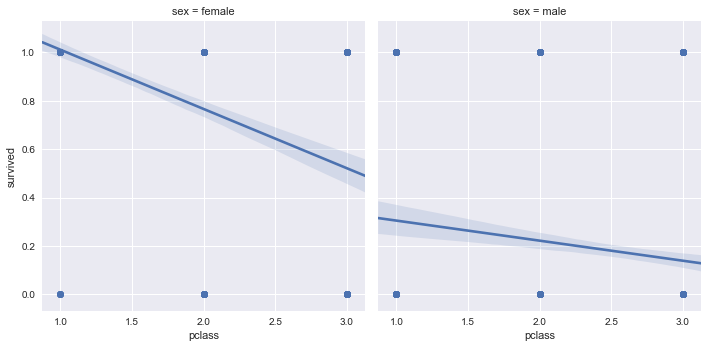

In [41]:
seaborn.lmplot(y='survived', x='pclass', data=data, col='sex')

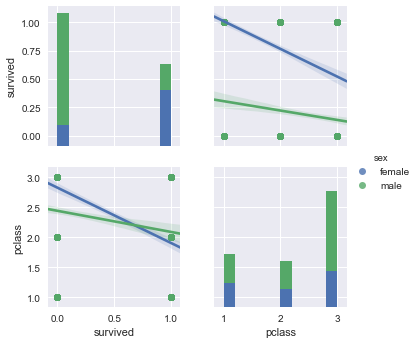

In [45]:
seaborn.pairplot(data, vars=['survived', 'pclass'], kind='reg', hue='sex')

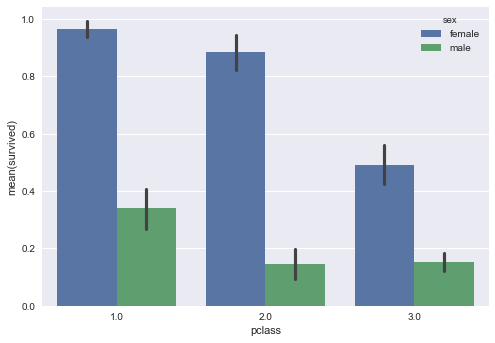

In [57]:
seaborn.barplot(x="pclass", y="survived", hue="sex", data=data)


In [ ]:
# sex and pclass are the highest coefficients for predicting survival
# i will use age*pclass as artificial feature for the model

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.cross_validation import train_test_split, StratifiedKFold

In [137]:
# Data preperation

In [138]:
# Prepare datasets for modelling

In [139]:
# Transform sex into binary values 0 an 1
Sex = pd.Series(np.where(data.sex == 'male', 1, 0), name = 'Sex')

In [140]:
# Create a new variable for every unique value of pclass
Pclass = pd.get_dummies(data.pclass, prefix='pclass')

In [141]:
# Fill missing values in variables

In [142]:
imputed = pd.DataFrame()
imputed['pclass'] = data.pclass.fillna(data.pclass.mean())
# imputed['sex'] = data.sex.fillna(data.sex.())

In [143]:
# Variable selection

In [144]:
data_x = pd.concat([Pclass, Sex], axis=1)
data_x.head()

,pclass_1.0,pclass_2.0,pclass_3.0,Sex
0,1,0,0,0
1,1,0,0,1
2,1,0,0,0
3,1,0,0,1
4,1,0,0,0


In [145]:
# Create datasets

In [146]:
train_valid_x = data_x[0:1309]
train_valid_y = data[0:1309].survived
test_x = data_x[1309: ]
data_x, valid_x, data_y, valid_y = train_test_split(train_valid_x, train_valid_y)

print(data_x.shape, valid_x.shape, data_y.shape, valid_y.shape, test_x.shape)

(981, 4) (328, 4) (981,) (328,) (1, 4)


In [147]:
# Model selection - SVC

In [148]:
model = SVC()

In [149]:
model.fit(data_x, data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
# Evaluation

In [151]:
# Model performance
print(model.score(data_x, data_y), model.score(valid_x, valid_y))

0.781855249745 0.786585365854
